<a href="https://colab.research.google.com/github/vsuguimoto/imersao-dados-desafio-final/blob/main/Notebooks/ProjetoFinalAluraSuguimoto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://www.alura.com.br/assets/img/imersoes/imersao-dados/logo-mersao.1616501197.svg" alt="drawing" width="200"/><center/>

### Importações e Funções

In [60]:
# Importações
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
sns.set()

In [61]:
# Funções

# Usadas em Dados
def informacoesDados(coluna):
  '''Verifica as informações de uma variável categórica para o dataset
  dados.
  '''

  print(f'''As categorias e contagem para a coluna {coluna} são:
  
{dados[coluna].value_counts()}''')

def grafCountDados(coluna):
  '''Plota um gráfico de barras para as variáveis categóricas da colunas.
  '''

  plt.figure(figsize=(10,5))
  ax = sns.countplot(data=dados, x=coluna, color='royalblue')
  ax.set_title(f'{coluna.capitalize()}')
  ax.set_ylabel('Contagem')
  ax.set_xlabel('Categorias')

# Desafio Final da Imersão Dados - Alura
O desafio consiste em construir um projeto de análise exploratória de dados e criar um modelo de *machine learning* para auxiliar a descoberta de novos medicamentos.





**Conjuntos de dados Utilizados:**  
Esse projeto foi inspirado em um desafio do Laboratory innovation science at Harvard disponibilizando os dados em uma competição no kaggle.

In [62]:
urlDados      = 'https://github.com/vsuguimoto/imersao-dados-desafio-final/blob/main/Dados/dados_experimentos.zip?raw=true'
urlResultados = 'https://github.com/vsuguimoto/imersao-dados-desafio-final/blob/main/Dados/dados_resultados.csv?raw=true'

dados = pd.read_csv(urlDados, compression = 'zip')
resultados = pd.read_csv(urlResultados)

## Exploração Inicial dos Dados
Há duas bases de dados que irão ser estudadas.  
A primeira delas, nomeada **dados**, possui informações a respeito das influências nas expressões gênicas e grupo de células de acordo com a droga, dosagem e tempo de ação.A segunda, nomeada **resultados**, possui informações a respeito do mecanismo de ação, referenciado aqui por MOA, ativado de acordo com a identificação da cultura de células.  
A priori faremos uma análise exploratória de cada um dos conjunto de dados:


### Análise exploratória dos dados experimentais (dados)

In [63]:
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [64]:
linhas, colunas = dados.shape
print(f'O dataset possui {linhas} linhas e {colunas} colunas.')

O dataset possui 23814 linhas e 877 colunas.


As categorias e contagem para a coluna tempo são:
  
48    8250
72    7792
24    7772
Name: tempo, dtype: int64


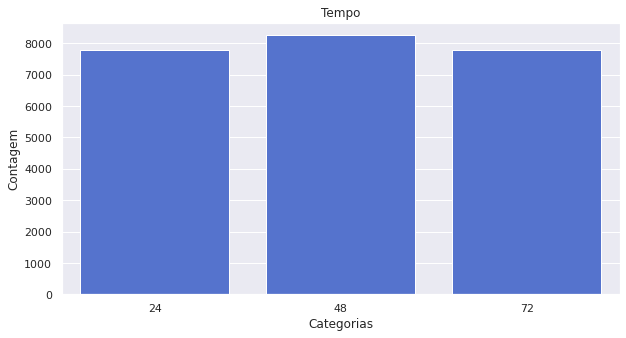

In [65]:
grafCountDados('tempo') 
informacoesDados('tempo')

As categorias e contagem para a coluna dose são:
  
D1    12147
D2    11667
Name: dose, dtype: int64


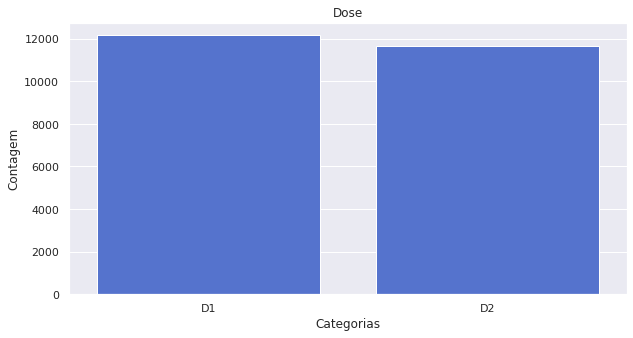

In [66]:
grafCountDados('dose')
informacoesDados('dose')

As categorias e contagem para a coluna tratamento são:
  
com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64


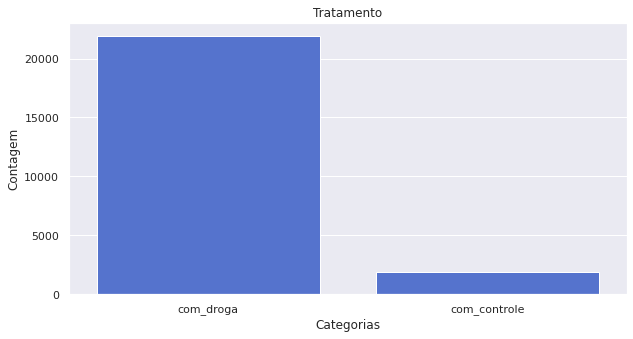

In [67]:
grafCountDados('tratamento')
informacoesDados('tratamento')

In [68]:
informacoesDados('droga')

As categorias e contagem para a coluna droga são:
  
cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
             ... 
fb8a93a83       1
36dc71f82       1
06787fefe       1
35519ef6d       1
c7e535136       1
Name: droga, Length: 3289, dtype: int64


Repare que a há várias drogas sendo testadas ao mesmo tempo, algumas delas possuem apenas um teste. Outro ponto é que a droga "_cacb2b860_" foi testada o mesmo número de vezes que o tamanho do grupo de controle. Iremos confirmar que tal droga representa o placebo.

In [69]:
all(dados.query('tratamento == "com_controle"') == dados.query('droga == "cacb2b860"'))

True

In [70]:
dados.loc[:, 'g-0'].describe()


count    23814.000000
mean         0.248366
std          1.393399
min         -5.513000
25%         -0.473075
50%         -0.008850
75%          0.525700
max         10.000000
Name: g-0, dtype: float64

In [71]:
minGen = dados.loc[:, 'g-0':'g-771'].min().min()
maxGen = dados.loc[:, 'g-0':'g-771'].max().max()
print(f'As expressões gênicas variam de {minGen} a {maxGen}.')

As expressões gênicas variam de -10.0 a 10.0.


In [72]:
dados.loc[:, 'c-0'].describe()

count    23814.000000
mean        -0.355156
std          1.752565
min        -10.000000
25%         -0.549300
50%         -0.009000
75%          0.448975
max          3.365000
Name: c-0, dtype: float64

In [73]:
minCel = dados.loc[:, 'c-0':'c-99'].min().min()
maxCel = dados.loc[:, 'c-0':'c-99'].max().max()
print(f'As influencias celulares variam de {minCel} a {maxCel}.')

As influencias celulares variam de -10.0 a 6.412000000000001.


#### Sobre os Dados
O dataset de __Dados__ possui as seguintes colunas:
 - id
 : identificação única da cultura de células;
 - tratamento
 : categórica entre com_droga e com_controle, distinguindo os grupos do experimento em que foi usado o composto e o placebo, respectivamente;
 - tempo
 : quantia em horas em que se tira as medidas após a droga ser aplicada;
 - dose
 : categórica entre D1 e D2, distinguindo a dosagem usada.
 - g0 - g771
 : expressões gênicas normalizadas, valores contínuos de -10 a 10
 - c0 - c99
 : variações nos grupos celulares, valores contínuos de -10 a 6.412.

**Nota**: são utilizadas duas funções que se encontram no primeiro tópico deste arquivo.

### Análise exploratória dos resultados experimentais (resultados)

In [74]:
resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [75]:
linhasR, colunasR = resultados.shape
print(f'O dataset possui {linhasR} linhas e {colunasR} colunas.')

O dataset possui 23814 linhas e 207 colunas.


In [76]:
resultados.iloc[:, 1].unique()

array([0, 1])

In [77]:
acoes = pd.DataFrame([x.split('_')[-1] for x in resultados.drop('id', axis=1).columns], columns = ['acao'])
acoes = pd.DataFrame(acoes.value_counts(), columns = ['count']).reset_index()
acoes.head()

,acao,count
0,inhibitor,112
1,antagonist,32
2,agonist,28
3,activator,5
4,agent,3


#### Sobre os Dados
O dataset de **resultados** possui várias colunas:
 - id
 : identificação única do objeto de estudo
 - MOAs (Mecânismos de ação)
 : são 206 MOAs, possuem valores de 0 e 1, significando a não ativação e ativação do mecanismo, respectivamente, para cada valor.

## Hipótese Inicial
 Como há diversos compostos e muitos com poucos dados (apenas uma entrada/teste), é possível que tais entradas influenciem negativamente na acurácia do modelo justamente pela falta de dados.

## Objetivos
 1. Visualizar a influência das variáveis tempo e dose na ativação de algum mecanismo e ação para os compostos mais utilizados no experimento. 
 2. Criar um modelo de previsão de ativação de ao menos um mecânismo de ação para as drogas mais utilizados.
 3. Verificar se ele é superior a um modelo "dummy" e a um modelo com todos os dados. 

### Organização dos Dados


Pretende-se verificar a ativação de algum mecanismo de ação, portanto cria-se duas novas colunas:   
 - n_moa: referente a quantia de MOAs ativados para aquele ID;  
 - ativo_moa: verifica se algum MOA foi ativado.

In [78]:
resultados['n_moa'] = resultados.drop('id', axis = 1).sum(axis = 1)
resultados['ativo_moa'] = (resultados['n_moa'] != 0)

Combina-se as colunas "n_moa" e "ativo_moa" com o dataset "dados" formando o dataset "combinados"

In [79]:
combinados = pd.merge(dados, resultados[['id','n_moa', 'ativo_moa']], on = 'id')

Sabe-se que a droga mais testada é o placebo, repare na queda dos testes a partir da 8ª droga. Para o modelo e análise serão usados apenas as drogas com mais de 30 testes.

In [80]:
dados['droga'].value_counts()[0:11]

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
d08af5d4b     196
292ab2c28     194
d50f18348     186
d1b47f29d     178
67c879e79      19
d488d031d      18
Name: droga, dtype: int64

Cria-se uma máscara de acordo com as restrições acima.

In [81]:
maskDados = list(dados['droga'].value_counts()[0:9].index)

combinadosM = combinados.query('droga in @maskDados')

Resultando na tabela "combinadosM".

In [82]:
combinadosM.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,0.5846,-0.2633,-2.1490,0.4881,1.4750,-0.0488,-0.0561,0.1641,0.1749,-0.3464,-0.1811,0.5685,1.2970,1.0510,-0.9585,0.7911,-0.2991,2.7420,-0.5979,-1.0240,0.7268,0.1590,-1.9730,1.1340,-2.5720,0.2068,0.9992,-0.1958,0.2262,1.0140,...,-0.0530,0.2077,-0.0825,0.2156,0.8142,1.0990,1.0860,0.4011,-0.1342,0.4653,-0.1104,0.3935,1.2370,-0.5072,0.0351,0.5084,-0.1248,0.4351,0.1389,0.6726,0.6070,0.3431,-0.4116,0.1194,0.342,0.1331,0.8541,0.6282,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260,1,True
16,id_002fb9c19,com_droga,48,D1,87d714366,8.7380,0.1914,2.4380,-0.2930,3.2010,1.4910,5.3920,-1.0420,-8.4860,-2.5790,-6.7470,3.6150,-1.4510,0.6909,-0.7623,-2.9400,-9.2850,-6.7110,-0.4195,1.1600,-1.3180,1.3660,-1.4020,-2.6220,0.7204,-2.5930,-4.0630,-0.8282,-3.5000,0.9206,-5.1450,9.8040,-2.6840,-2.4390,-0.1427,...,-10.0000,-10.0000,-8.5110,-10.0000,-10.0000,-10.0000,-10.0000,-8.8870,-10.0000,-10.0000,-10.0000,-10.0000,-4.9020,-9.9840,-5.5520,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.796,-8.1770,-9.8990,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-6.7840,2,True
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,0.1588,0.7785,0.7062,-0.7951,1.3770,0.2856,-0.8331,0.3879,1.3290,-0.4746,0.0857,-0.2745,-0.1093,0.2603,0.7386,-0.6665,-1.6520,-0.9262,0.0000,1.6310,-0.2933,0.2043,-2.2070,0.1383,-0.4966,0.6922,-0.4077,0.2303,-0.0456,-0.7447,...,0.3768,0.4318,-0.1051,0.3933,-0.3189,0.4128,-0.2116,-1.0410,0.7798,0.1579,1.7250,1.4490,0.9117,-0.0754,-0.8396,0.7640,1.2080,1.1890,0.2114,0.6335,0.3265,-0.1056,0.5478,0.7477,1.234,0.5035,-0.6591,0.3023,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050,0,False
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,0.3856,-0.1670,-0.5400,0.2721,-0.2479,0.0761,-0.4054,2.9760,-0.7679,0.6995,0.0752,0.5943,0.4266,0.0000,1.0410,-0.1131,0.6593,-0.6890,0.5115,-0.2512,-0.8775,-1.3810,0.1419,-0.0363,0.2559,2.5290,0.2853,1.4690,-0.3626,...,-0.7493,-0.2701,0.1205,0.2396,0.3506,-0.9233,0.2490,-0.0824,0.4841,1.1940,-1.1650,-0.4853,1.1080,-0.5979,0.7438,0.2050,-0.2761,-0.1748,0.3385,-0.3500,-0.0309,-0.0409,-0.0735,0.2732,-1.210,0.0089,0.0317,0.4721,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820,0,False
39,id_0079d45d3,com_droga,24,D1,292ab2c28,1.6310,-2.1430,-0.0943,-1.1990,0.4869,-0.0935,1.2090,-3.8910,-1.5450,-2.2870,-2.2040,-0.8888,-1.1730,0.0444,-3.9430,0.1673,-0.9502,-1.1750,0.1686,3.8480,-2.9760,-0.0389,1.6330,-0.0655,1.3810,-2.4340,-1.8040,0.3945,-1.2080,-0.1963,-2.0170,0.6004,-2.5860,-1.4550,-0.4141,...,-2.5430,-6.4260,-2.5320,-4.3570,-4.7560,-0.8781,-3.7800,-1.6340,-3.9660,-1.7890,-3.2480,-2.6720,-1.3250,-2.3430,-3.2220,-2.5160,-2.3410,-2.4620,-3.8760,-2.2450,-3.9450,-1.7400,-4.4320,-3.6740,-2.981,-4.5770,-1.8620,-1.9120,-2.9240,-5.7720,-1.9360,-2.8860,-2.7680,-2.4840,-2.7020,-2.2530,-4.8360,-0.6461,0,False


### Influência do Tempo e Dose

Para comparar a diferença entre as variáveis Tempo e Dose para cada droga, a melhor forma de fazê-lo é através de uma visualização. A seguir temos um gráfico de barras para cada droga com o número de ativação para dada dose e tempo.

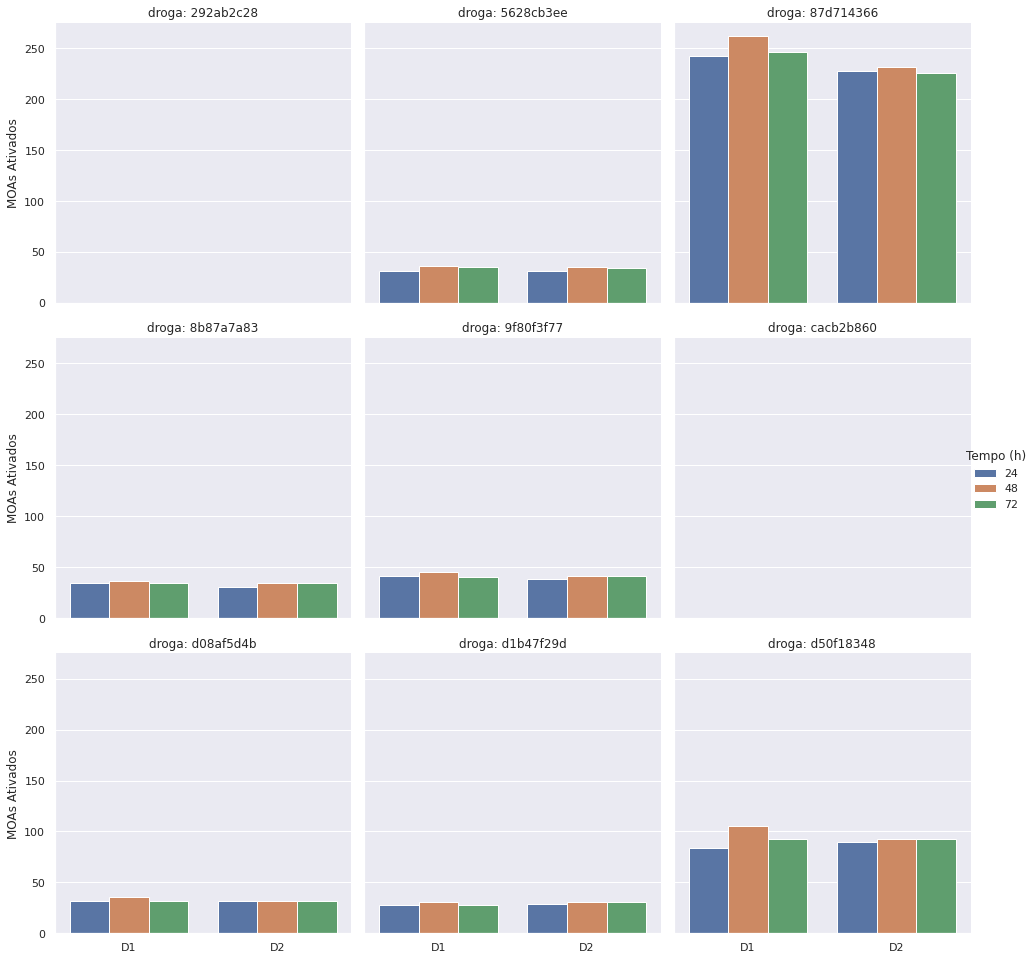

In [83]:
data = combinadosM.groupby(['droga','tempo','dose']).sum()['n_moa'].reset_index()

g = sns.catplot(data=data, x='dose', kind='bar', y='n_moa',
                 hue='tempo', col='droga', col_wrap=3, height=4.5, 
                 margin_titles=True, legend=True)

g.legend.set_title('Tempo (h)')
g.set_axis_labels('', 'MOAs Ativados')
g.set_titles("{col_var}: {col_name}")
plt.show()

Repare que há duas drogas que não ativam nenhum mecanismo de ação. A _cacb2b860_, que já era de se esperar uma vez que ela representa o placebo, e a _292ab2c28_, essa por sua vez não representa o placebo e se desconhece a causa por não causar nenhuma ativação.

### Modelo de Machine Learning

![FlowChart](https://miro.medium.com/max/753/0*XitqTqJMytRRsCFL.png)  
O modelo de Machine Learning foi escolhido de acordo com o flowchart acima e será o Random Forest.


In [84]:
combinadosM.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_moa,ativo_moa
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,0.5846,-0.2633,-2.1490,0.4881,1.4750,-0.0488,-0.0561,0.1641,0.1749,-0.3464,-0.1811,0.5685,1.2970,1.0510,-0.9585,0.7911,-0.2991,2.7420,-0.5979,-1.0240,0.7268,0.1590,-1.9730,1.1340,-2.5720,0.2068,0.9992,-0.1958,0.2262,1.0140,...,-0.0530,0.2077,-0.0825,0.2156,0.8142,1.0990,1.0860,0.4011,-0.1342,0.4653,-0.1104,0.3935,1.2370,-0.5072,0.0351,0.5084,-0.1248,0.4351,0.1389,0.6726,0.6070,0.3431,-0.4116,0.1194,0.342,0.1331,0.8541,0.6282,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260,1,True
16,id_002fb9c19,com_droga,48,D1,87d714366,8.7380,0.1914,2.4380,-0.2930,3.2010,1.4910,5.3920,-1.0420,-8.4860,-2.5790,-6.7470,3.6150,-1.4510,0.6909,-0.7623,-2.9400,-9.2850,-6.7110,-0.4195,1.1600,-1.3180,1.3660,-1.4020,-2.6220,0.7204,-2.5930,-4.0630,-0.8282,-3.5000,0.9206,-5.1450,9.8040,-2.6840,-2.4390,-0.1427,...,-10.0000,-10.0000,-8.5110,-10.0000,-10.0000,-10.0000,-10.0000,-8.8870,-10.0000,-10.0000,-10.0000,-10.0000,-4.9020,-9.9840,-5.5520,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.796,-8.1770,-9.8990,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-6.7840,2,True
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,0.1588,0.7785,0.7062,-0.7951,1.3770,0.2856,-0.8331,0.3879,1.3290,-0.4746,0.0857,-0.2745,-0.1093,0.2603,0.7386,-0.6665,-1.6520,-0.9262,0.0000,1.6310,-0.2933,0.2043,-2.2070,0.1383,-0.4966,0.6922,-0.4077,0.2303,-0.0456,-0.7447,...,0.3768,0.4318,-0.1051,0.3933,-0.3189,0.4128,-0.2116,-1.0410,0.7798,0.1579,1.7250,1.4490,0.9117,-0.0754,-0.8396,0.7640,1.2080,1.1890,0.2114,0.6335,0.3265,-0.1056,0.5478,0.7477,1.234,0.5035,-0.6591,0.3023,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050,0,False
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,0.6041,0.3856,-0.1670,-0.5400,0.2721,-0.2479,0.0761,-0.4054,2.9760,-0.7679,0.6995,0.0752,0.5943,0.4266,0.0000,1.0410,-0.1131,0.6593,-0.6890,0.5115,-0.2512,-0.8775,-1.3810,0.1419,-0.0363,0.2559,2.5290,0.2853,1.4690,-0.3626,...,-0.7493,-0.2701,0.1205,0.2396,0.3506,-0.9233,0.2490,-0.0824,0.4841,1.1940,-1.1650,-0.4853,1.1080,-0.5979,0.7438,0.2050,-0.2761,-0.1748,0.3385,-0.3500,-0.0309,-0.0409,-0.0735,0.2732,-1.210,0.0089,0.0317,0.4721,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820,0,False
39,id_0079d45d3,com_droga,24,D1,292ab2c28,1.6310,-2.1430,-0.0943,-1.1990,0.4869,-0.0935,1.2090,-3.8910,-1.5450,-2.2870,-2.2040,-0.8888,-1.1730,0.0444,-3.9430,0.1673,-0.9502,-1.1750,0.1686,3.8480,-2.9760,-0.0389,1.6330,-0.0655,1.3810,-2.4340,-1.8040,0.3945,-1.2080,-0.1963,-2.0170,0.6004,-2.5860,-1.4550,-0.4141,...,-2.5430,-6.4260,-2.5320,-4.3570,-4.7560,-0.8781,-3.7800,-1.6340,-3.9660,-1.7890,-3.2480,-2.6720,-1.3250,-2.3430,-3.2220,-2.5160,-2.3410,-2.4620,-3.8760,-2.2450,-3.9450,-1.7400,-4.4320,-3.6740,-2.981,-4.5770,-1.8620,-1.9120,-2.9240,-5.7720,-1.9360,-2.8860,-2.7680,-2.4840,-2.7020,-2.2530,-4.8360,-0.6461,0,False


**Separação Amostral**  
dadosModelo possui a base de dados filtrada;  
dadosCompleto possui a base sem filtros.

In [85]:
dadosModelo = pd.get_dummies(combinadosM, columns=['tempo', 'dose'])

x = dadosModelo.drop(['id', 'n_moa', 'ativo_moa', 'droga', 'tratamento'], axis = 1)
y = dadosModelo['ativo_moa']
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25, stratify = y)

In [86]:
dadosCompleto = pd.get_dummies(combinados, columns=['tempo', 'dose'])

xC = dadosCompleto.drop(['id', 'n_moa', 'ativo_moa', 'droga', 'tratamento'], axis = 1)
yC = dadosCompleto['ativo_moa']
xC_treino, xC_teste, yC_treino, yC_teste = train_test_split(xC, yC, test_size = 0.25, stratify = yC)

**Modelo com os dados filtrados**

In [87]:
randomforest = RandomForestClassifier()
randomforest.fit(x_treino, y_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**Modelo Dummy**

In [88]:
modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(xC_treino, yC_treino)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

**Modelo com os Dados Completos**

In [89]:
randomforestC = RandomForestClassifier()
randomforestC.fit(xC_treino, yC_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Testes

**Teste para os dados filtrados**

Modelo Filtrado

In [90]:
previsao_rForest = randomforest.predict(x_teste)
accuracy_score(y_teste, previsao_rForest)

0.9679358717434869

Modelo Completo

In [91]:
previsao_rForestC = randomforestC.predict(x_teste)
accuracy_score(y_teste, previsao_rForestC)

0.9729458917835672

Modelo Dummy


In [92]:
previsao_dummy = modelo_dummy.predict(x_teste)
accuracy_score(y_teste, previsao_dummy)

0.48396793587174347

**Teste Dados Completos**

Modelo Filtrado

In [93]:
previsao_rForest = randomforest.predict(xC_teste)
accuracy_score(yC_teste, previsao_rForest)

0.5047027208599261

Modelo Completo

In [94]:
previsao_rForestC = randomforestC.predict(xC_teste)
accuracy_score(yC_teste, previsao_rForestC)

0.6489754786698018

Modelo Dummy


In [95]:
previsao_dummy = modelo_dummy.predict(xC_teste)
accuracy_score(yC_teste, previsao_dummy)

0.6066509909304669

## Discussão e Resultados
 Ao longo da análise percebe-se que a quantia de MOAs ativados, "pouco" variou com relação a Dose ou o Tempo de coleta dos dados, mas havia grandes diferenças no número de ativação entre cada droga. Como se desconhece quais são os mecanismo de ação de interesse, não é possível dizer se essas variações possuem algum significado importante.  
 Para a previsão da ativação de um MOA utiliza-se uma abordagem simples, usando como alvo a ativação ou não de um MOA. Utiliza-se um modelo de **random forest** usando como base de treino os dados filtrados (com mais de 30 entradas para determinada droga) e os dados completo e espera-se que ao utilizar os dados filtrados crie-se um modelo com maior acurácia. 

Portanto são criados três modelos:
 1. Modelo Random Forest treinado com a base de dados filtrada, referido como Modelo Filtrado;
 2. Modelo Random Forest treinado com a base de dados completa, referido como Modelo Completo;
 3. Modelo Dummy.  

E os testes foram realizados em duas base dados:
 1. Base de dados filtrada
 2. Base de dados completa

Os resultados encontrados foram:

> Previsão dos Dados Filtrados:
- O Modelo Filtrado mostra uma acurácia muito similar ao Modelo Completo (97%) e os dois são bem mais acurados que o Dummy (48%). Mostrando uma capacidade de generalização na previsão de ativação ou não de um MOA para as drogas mais utilizadas.

> Previsão dos Dados Completos:
- Nesse caso a acurácia do Modelo Filtrado (51,69%) é inferior tanto ao do Modelo Completo (65%) quanto ao Dummy (60,6%). Mostrando uma incapacidade de generalizar a ativação ou não de um MOA, já que não há uma diferença significativa entre o modelo Dummy e os outros dois.

A hipótese inicial se mostra falha, contudo pode-se perceber uma possível generalização para uma seção do dataset, quando se usa apenas os compostos mais testados.
 


  


---

# Autor: Vinicius Suguimoto

[LinkedIn](https://www.linkedin.com/in/suguimotovinicius/)  
[Instagram](https://www.instagram.com/vinisug/)  
**Nota**: Os resultados aqui apresentados são apenas didáticos e não possuem significado real para a pesquisa.

